<a href="https://colab.research.google.com/github/EmanSalah2000/DeepVaeMNIST/blob/main/DeepVae.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras import layers
import numpy as np
from keras import backend as K
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

In [3]:
def plotting(n, digit_size, x_decoded):
  n = 15
  digit_size = 28
  figure = np.zeros((digit_size * n, digit_size * n))
  # We will sample n points within [-15, 15] standard deviations
  grid_x = np.linspace(-15, 15, n)
  grid_y = np.linspace(-15, 15, n)
  k = 0
  for i, yi in enumerate(grid_x):
      for j, xi in enumerate(grid_y):
          #z_sample = np.array([[xi, yi]])
          #x_decoded = decoder.predict(z_sample)
          
          digit = x_decoded[k].reshape(digit_size, digit_size)
          k=k+1
          figure[i * digit_size: (i + 1) * digit_size,
                j * digit_size: (j + 1) * digit_size] = digit
  plt.figure(figsize=(10, 10))
  plt.imshow(figure)
  plt.show()

In [4]:
original_dim = 28 * 28
intermediate_dim = 64
latent_dim = 10
inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)
print(z_mean.shape)

(None, 10)


In [5]:
z = layers.Lambda(sampling)([z_mean, z_log_sigma])
# Create encoder
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')
# Create decoder
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')
# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')
encoder.summary()
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           50240       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 10)           650         ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 10)           650         ['dense[0][0]']                  
                                                                                            

In [6]:
vae.compile(optimizer='adam')
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
vae.fit(x_train, x_train,
        epochs=100,
        batch_size=32)

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/100
1875/1875 [==============================] - 10s 3ms/step - loss: 146.8464
Epoch 2/100
1875/1875 [==============================] - 5s 3ms/step - loss: 116.6380
Epoch 3/100
1875/1875 [==============================] - 5s 3ms/step - loss: 110.2565
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 106.6507
Epoch 5/100
1875/1875 [==============================] - 5s 3ms/step - loss: 104.4941
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 103.0308
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 101.9349
Epoch 8/100
1875/1875 [==============================] - 5s 3ms/step - loss: 101.1411
Epoch 9/100
1875/1875 [==============================] - 5s 3ms/step - loss: 100.5010
Epoch 10/100
1875/1875 [==============================] - 5s 3ms/step - loss: 99.9604
Epoch 11/100
1875/1875 [==============================] - 5s 3ms/step - lo

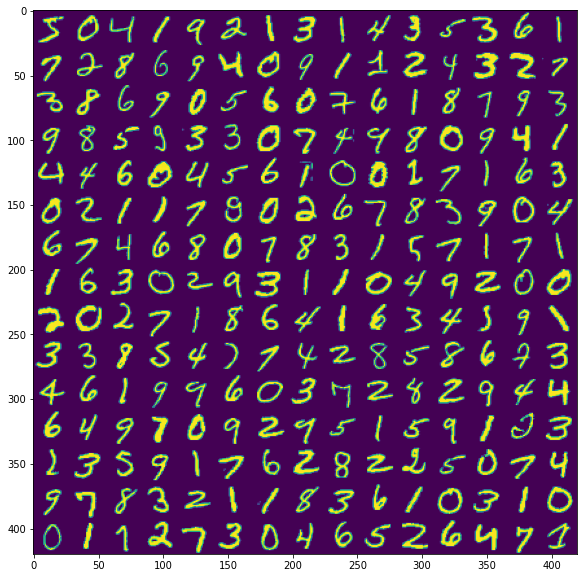

In [7]:
n = 15
digit_size = 28
plotting(n, digit_size, x_train)

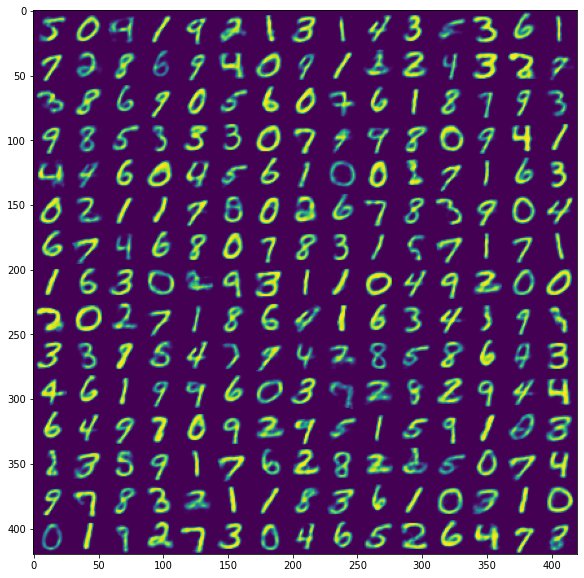

In [8]:
x_decoded = vae.predict(x_train)
plotting(n, digit_size, x_decoded)

In [9]:
z_zz = encoder.predict(x_train)
print (z_zz[2].shape)
print (z_zz[2][0].shape)

(60000, 10)
(10,)


***Here we run the first equation (Z + value) with different values (0.01, 0.1, 0.4, 0.6, 0.8) and we found the best value is 0.01.***

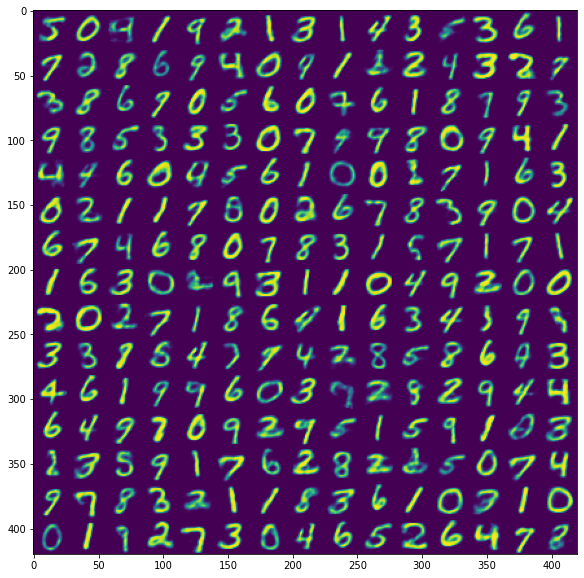

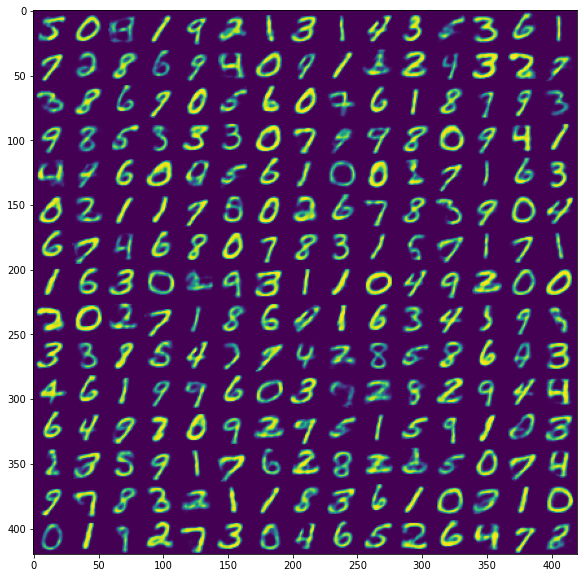

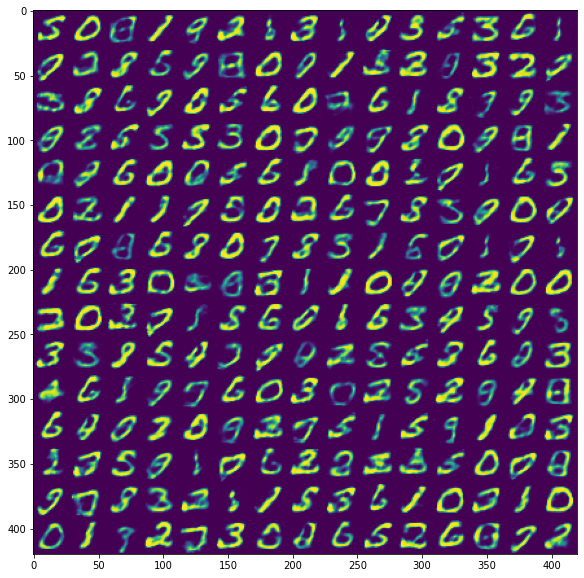

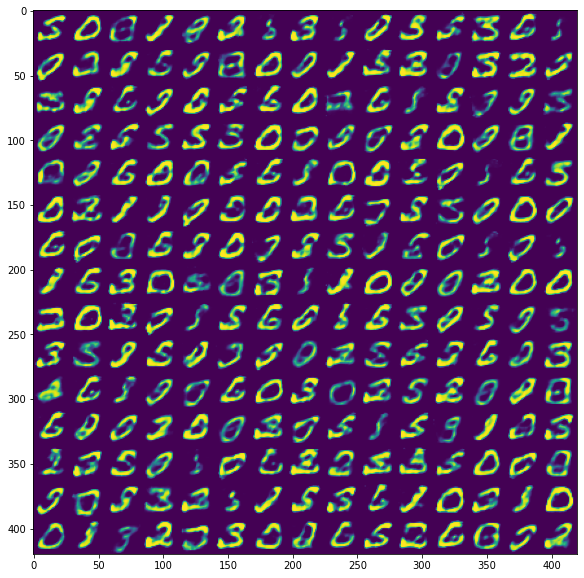

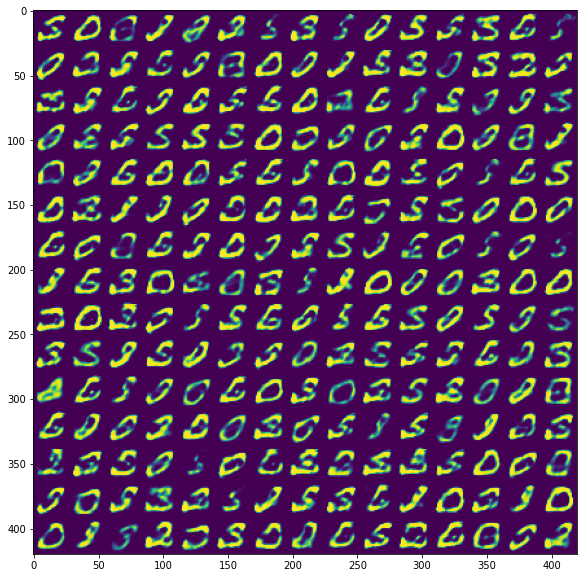

In [10]:
x_decoded = decoder.predict(z_zz[2] + 0.01)
plotting(n, digit_size, x_decoded)

x_decoded = decoder.predict(z_zz[2] + 0.1)
plotting(n, digit_size, x_decoded)

x_decoded = decoder.predict(z_zz[2] + 0.4)
plotting(n, digit_size, x_decoded)

x_decoded = decoder.predict(z_zz[2] + 0.6)
plotting(n, digit_size, x_decoded)

x_decoded = decoder.predict(z_zz[2] + 0.8)
plotting(n, digit_size, x_decoded)

Here we run the second equation (mean + variance * value) with different values (0.01, 0.1, 0.4, 0.6, 0.8) and the best value was 0.01 and we found that the second equation better than first equation.**bold text**

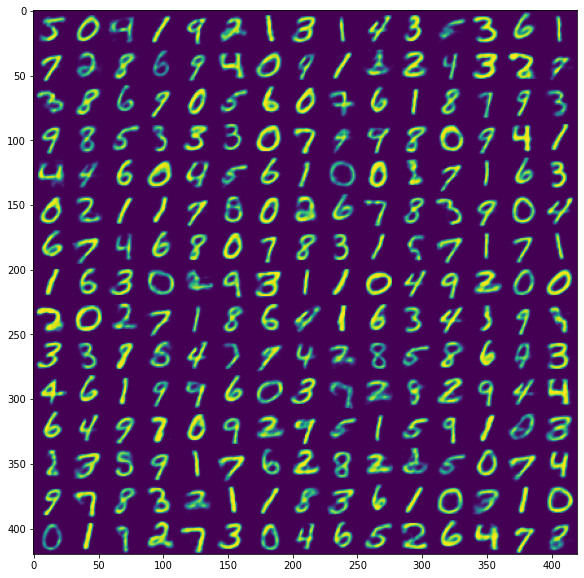

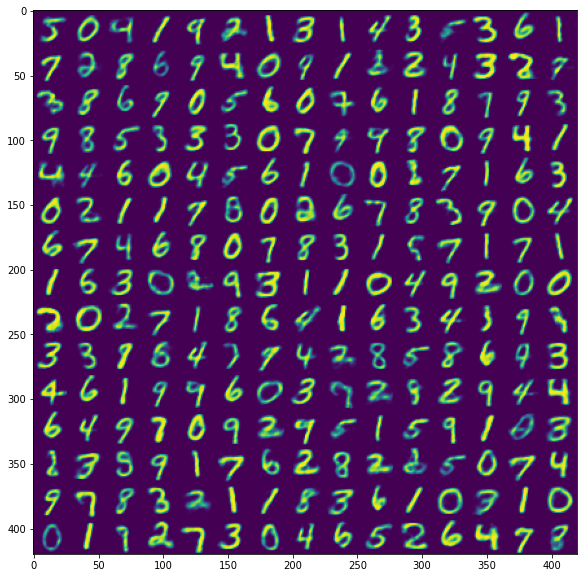

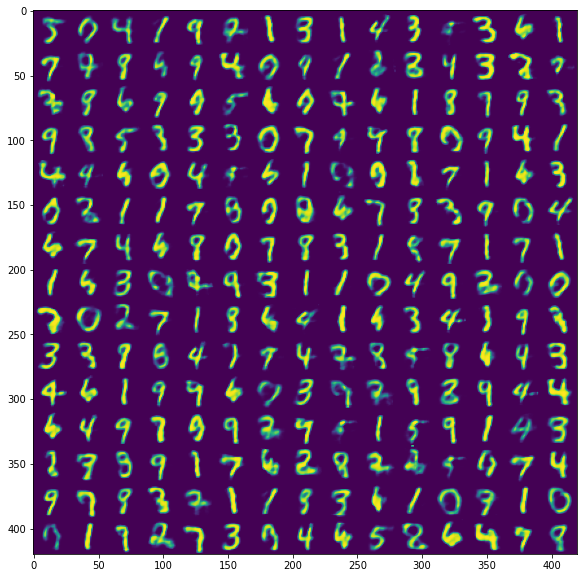

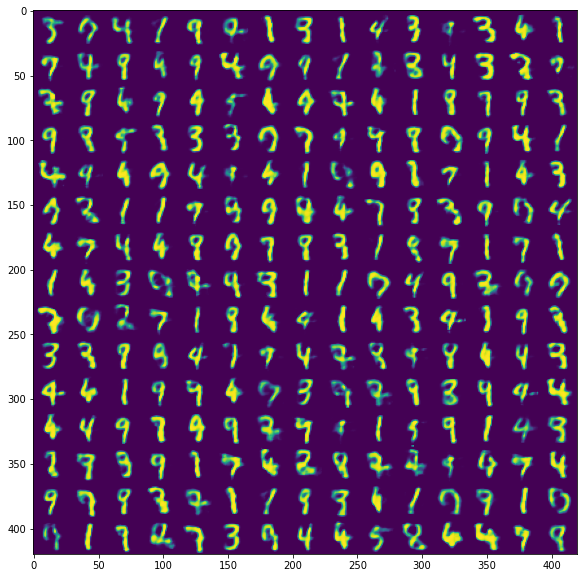

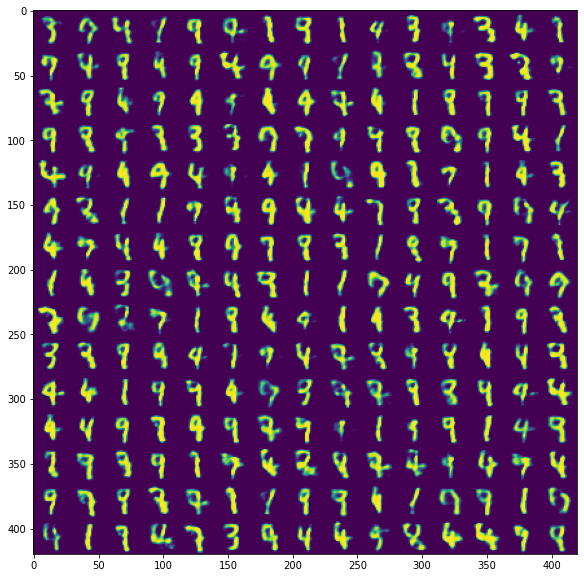

In [11]:
x_decoded = decoder.predict(z_zz[0] + z_zz[1] * 0.01)
plotting(n, digit_size, x_decoded)

x_decoded = decoder.predict(z_zz[0] + z_zz[1] * 0.1)
plotting(n, digit_size, x_decoded)

x_decoded = decoder.predict(z_zz[0] + z_zz[1] * 0.4)
plotting(n, digit_size, x_decoded)

x_decoded = decoder.predict(z_zz[0] + z_zz[1] * 0.6)
plotting(n, digit_size, x_decoded)

x_decoded = decoder.predict(z_zz[0] + z_zz[1] * 0.8)
plotting(n, digit_size, x_decoded)

In [12]:
def deep_model(latent_dim):
  original_dim = 28 * 28
  intermediate_dim_1 = 128
  intermediate_dim_2 = 64
  intermediate_dim_3 = 32
  inputs = keras.Input(shape=(original_dim,))
  h = layers.Dense(intermediate_dim_1, activation='relu')(inputs)
  h = layers.Dense(intermediate_dim_2, activation='relu')(h)
  h = layers.Dense(intermediate_dim_3, activation='relu')(h)
  z_mean = layers.Dense(latent_dim)(h)
  z_log_sigma = layers.Dense(latent_dim)(h)
  print(z_mean.shape)

  z = layers.Lambda(sampling)([z_mean, z_log_sigma])
  encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')

  latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
  x = layers.Dense(intermediate_dim_3, activation='relu')(latent_inputs)
  x = layers.Dense(intermediate_dim_2, activation='relu')(x)
  x = layers.Dense(intermediate_dim_1, activation='relu')(x)
  outputs = layers.Dense(original_dim, activation='sigmoid')(x)
  decoder = keras.Model(latent_inputs, outputs, name='decoder')

  outputs = decoder(encoder(inputs)[2])
  vae = keras.Model(inputs, outputs, name='vae_mlp')
  encoder.summary()

  reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
  reconstruction_loss *= original_dim
  kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
  kl_loss = K.sum(kl_loss, axis=-1)
  kl_loss *= -0.5
  vae_loss = K.mean(reconstruction_loss + kl_loss)
  vae.add_loss(vae_loss)
  vae.compile(optimizer='adam')

  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  x_train = x_train.astype('float32') / 255.
  x_test = x_test.astype('float32') / 255.
  x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
  x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

  vae.fit(x_train, x_train,
          epochs=100,
          batch_size=32)
          #validation_data=(x_test, x_test))

  n = 15  # figure with 15x15 digits
  digit_size = 28

  plotting(n, digit_size, x_train)

  x_decoded = vae.predict(x_train)
  plotting(n, digit_size, x_decoded)

  z_zz = encoder.predict(x_train)
  print (z_zz[2].shape)
  print (z_zz[2][0].shape)

  # x_decoded = decoder.predict(z_zz[2] + 0.1)
  x_decoded = decoder.predict(z_zz[0]+z_zz[1] * 0.01)
  plotting(n, digit_size, x_decoded)

Here we make the model more deeper we use more 2 hidden layers. And we change latend dim in them (10, 20, 5) and we found that the value 20 is the best. **bold text***

(None, 10)
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 128)          100480      ['input_2[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 64)           8256        ['dense_5[0][0]']                
                                                                                                  
 dense_7 (Dense)                (None, 32)           2080        ['dense_6[0][0]']                
                                                                                 

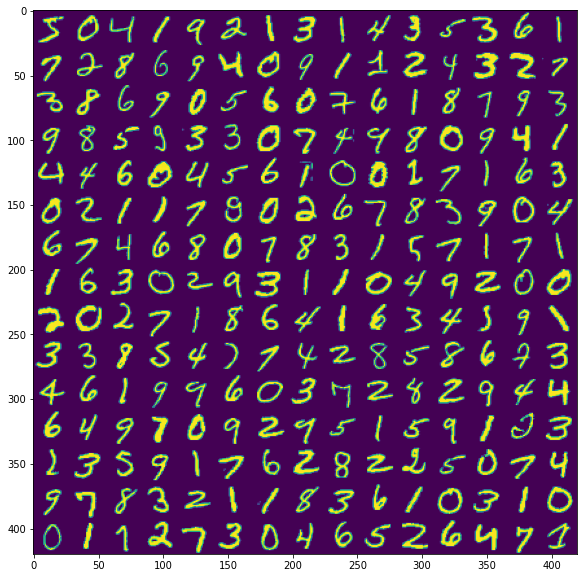

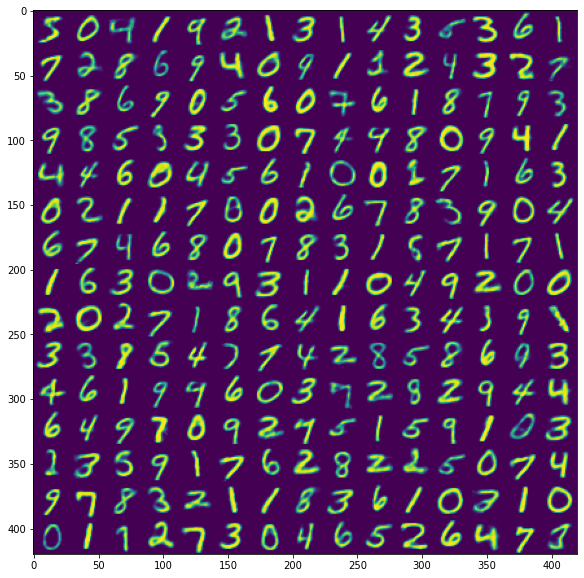

(60000, 10)
(10,)


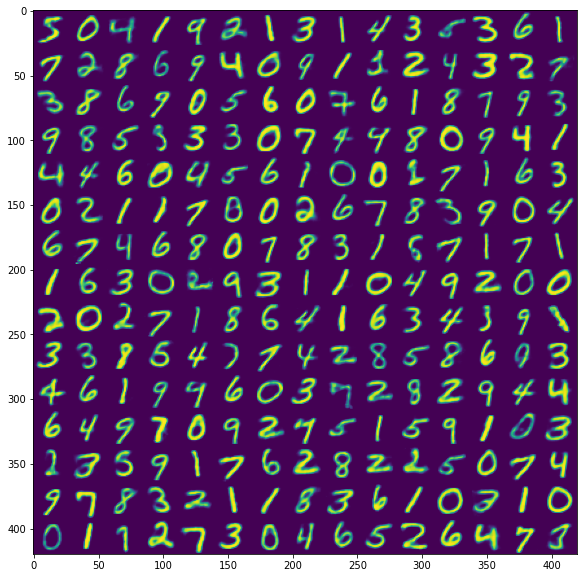

In [13]:
latent_dim = 10
deep_model(latent_dim)

(None, 5)
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_14 (Dense)               (None, 128)          100480      ['input_3[0][0]']                
                                                                                                  
 dense_15 (Dense)               (None, 64)           8256        ['dense_14[0][0]']               
                                                                                                  
 dense_16 (Dense)               (None, 32)           2080        ['dense_15[0][0]']               
                                                                                  

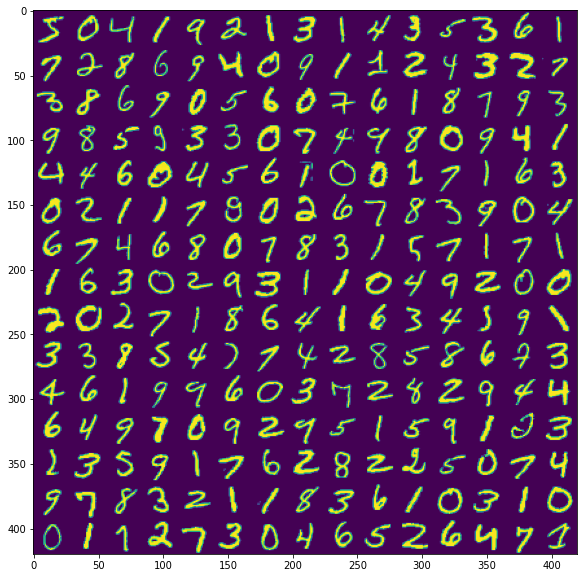

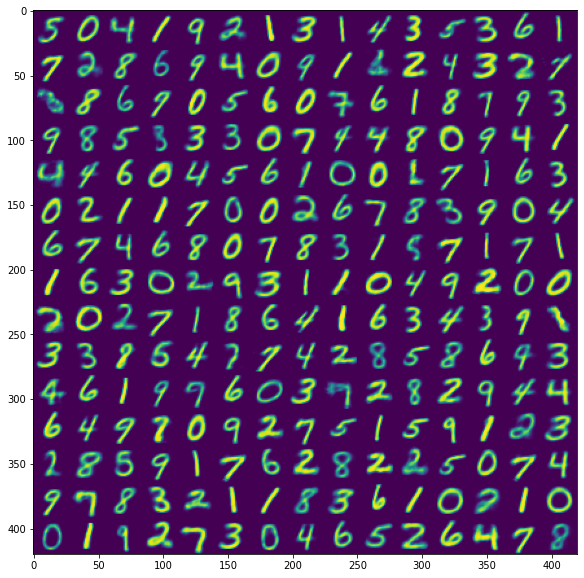

(60000, 5)
(5,)


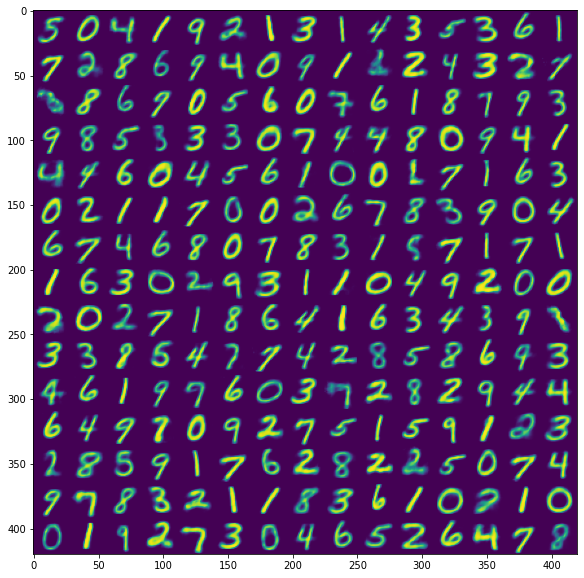

In [14]:
latent_dim = 5
deep_model(latent_dim)

(None, 20)
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 784)]        0           []                               
                                                                                                  
 dense_23 (Dense)               (None, 128)          100480      ['input_4[0][0]']                
                                                                                                  
 dense_24 (Dense)               (None, 64)           8256        ['dense_23[0][0]']               
                                                                                                  
 dense_25 (Dense)               (None, 32)           2080        ['dense_24[0][0]']               
                                                                                 

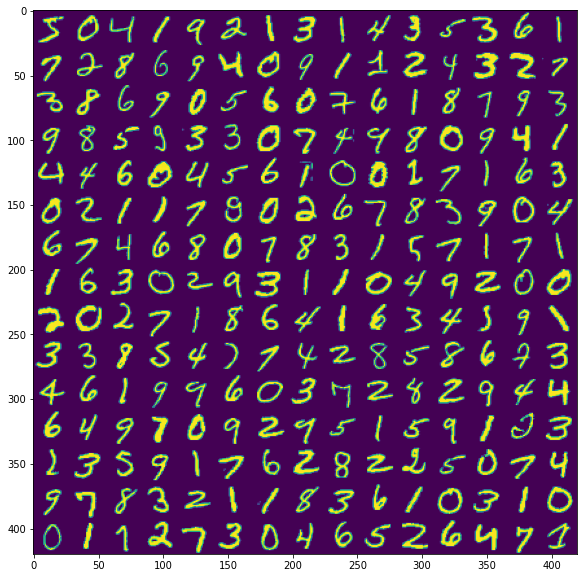

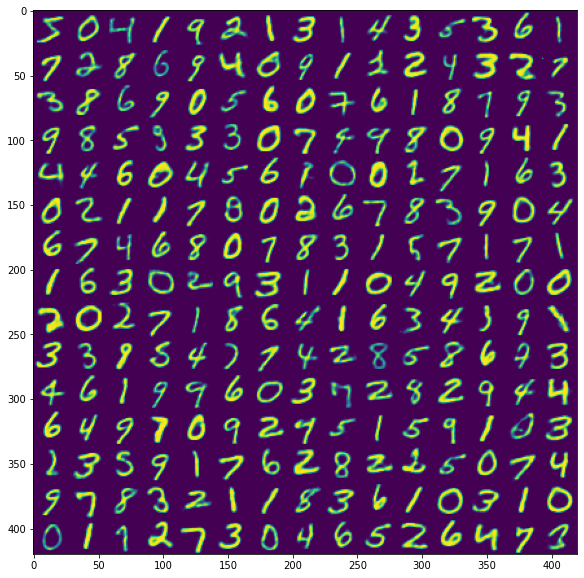

(60000, 20)
(20,)


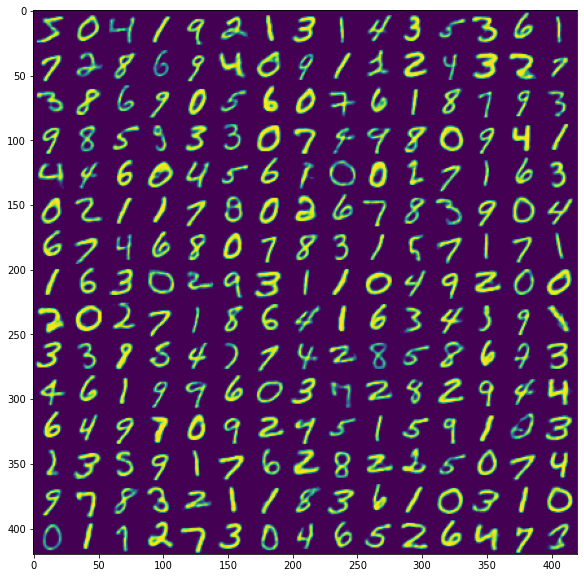

In [15]:
latent_dim = 20
deep_model(latent_dim)